# Simple Workflow with jobflow

## Define workflow with jobflow

In [1]:
from jobflow import job, Flow

/home/jan/mambaforge/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/jan/mambaforge/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
from python_workflow_definition.jobflow import write_workflow_json

In [3]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y, 
    add_x_and_y_and_z as _add_x_and_y_and_z,
)

In [4]:
workflow_json_filename = "jobflow_simple.json"

In [5]:
add_x_and_y = job(_add_x_and_y, data=["x", "y", "z"])
add_x_and_y_and_z = job(_add_x_and_y_and_z)

In [6]:
obj = add_x_and_y(x=1, y=2)

In [7]:
w = add_x_and_y_and_z(x=obj.output.x, y=obj.output.y, z=obj.output.z)

In [8]:
flow = Flow([obj, w])

In [9]:
write_workflow_json(flow=flow, file_name=workflow_json_filename)

In [10]:
!cat {workflow_json_filename}

{"nodes": {"0": "simple_workflow.add_x_and_y", "1": "simple_workflow.add_x_and_y_and_z", "2": 1, "3": 2}, "edges": [{"target": 0, "targetHandle": "x", "source": 2, "sourceHandle": null}, {"target": 0, "targetHandle": "y", "source": 3, "sourceHandle": null}, {"target": 1, "targetHandle": "x", "source": 0, "sourceHandle": "x"}, {"target": 1, "targetHandle": "y", "source": 0, "sourceHandle": "y"}, {"target": 1, "targetHandle": "z", "source": 0, "sourceHandle": "z"}]}

## Load Workflow with aiida

In [11]:
from aiida import load_profile

load_profile()

Profile<uuid='c08748df7ab74ec08c14e5f16cebc987' name='pwd'>

In [12]:
from python_workflow_definition.aiida import load_workflow_json

In [13]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [14]:
wg.run()

03/22/2025 05:13:01 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: pickle_node3,pickle_node4
03/22/2025 05:13:04 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 11, 18
03/22/2025 05:13:15 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: pickle_node3, type: PYTHONJOB, finished.
03/22/2025 05:13:15 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: pickle_node4, type: PYTHONJOB, finished.


invalid state


03/22/2025 05:13:16 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y1
03/22/2025 05:13:16 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 33
03/22/2025 05:13:23 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|update_task_state]: Task: add_x_and_y1, type: PYTHONJOB, finished.
03/22/2025 05:13:24 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y_and_z2
03/22/2025 05:13:25 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|on_wait]: Process status: Waiting for child processes: 46
03/22/2025 05:13:32 PM <12689> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [3|WorkGraphEngine|u

## Load Workflow with pyiron_base

In [15]:
from pyiron_base import Project

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [17]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

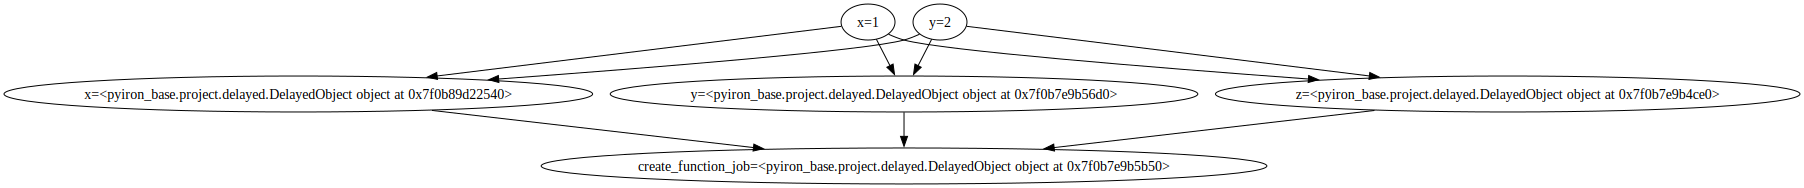

In [18]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [19]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 8
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 9


6